# Data Science 3 - Tsinghua University Kim Sumin 金秀珉
# Task - 2

# 0. Preprocessing

First, i checked the data type and whether there are nan values or not.
Through 'shape', checked how many nan values exist, and confirmed that there are not many values missing. 
So rather replacing value, i removed that row to remove nan values.
Other problem is the datatype, as datatype is not numeric(object) kmeans clustering is not working. 
Through .astype, object type data are converted into float type. 

In [55]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import missingno as msno
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import r2_score

In [56]:
Customer_Preference_Original = pd.read_csv("Customer Preference.csv")
Customer_Preference_Original.dtypes

Customer No.            object
citric_acid            float64
residual_sugar         float64
density                float64
ph                     float64
Diacetyl               float64
Ethyl_maltol           float64
Ethylvanillin           object
Limonene               float64
Manzanate              float64
Ethyl_acetate          float64
Isoamyl_acetate        float64
Pentyl_butyrate         object
Octyl_acetate          float64
Benzyl_acetate         float64
Methyl_anthranilate    float64
Myrcene                float64
Nerolidol              float64
Camphor                float64
dtype: object

In [57]:
Customer_Preference_Original_columns = Customer_Preference_Original.iloc[:,0:19:1]

In [58]:
Sweetie_Flavour_Original = pd.read_csv("Sweetie Flavour.csv")
Sweetie_Flavour_dropped = Sweetie_Flavour_Original.dropna()

<AxesSubplot:>

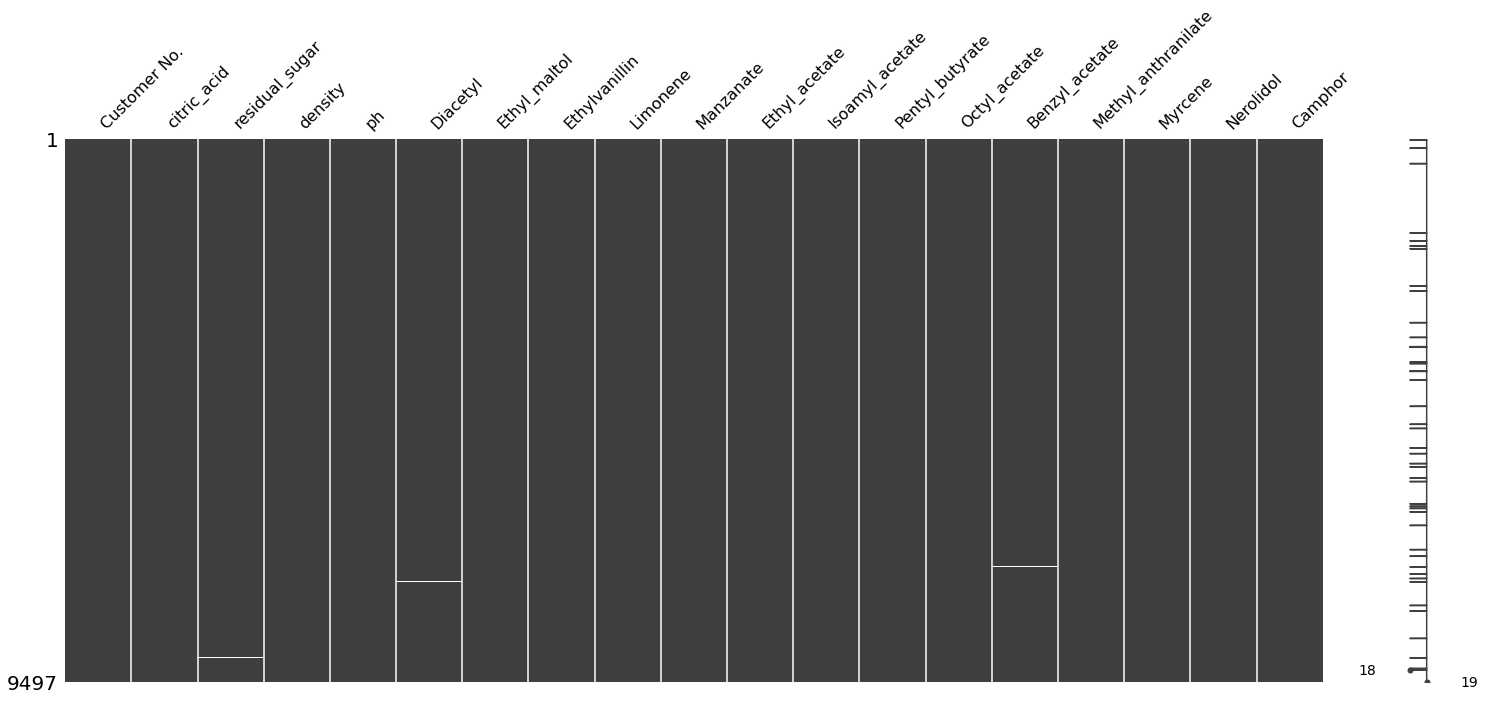

In [59]:
one_hot_check_acc_stat = pd.get_dummies(Customer_Preference_Original_columns)
msno.matrix(Customer_Preference_Original_columns)

In [60]:
print(Customer_Preference_Original.isnull().sum())
Customer_Preference_Original.shape

Customer No.           0
citric_acid            1
residual_sugar         3
density                3
ph                     4
Diacetyl               3
Ethyl_maltol           2
Ethylvanillin          0
Limonene               4
Manzanate              2
Ethyl_acetate          1
Isoamyl_acetate        3
Pentyl_butyrate        0
Octyl_acetate          2
Benzyl_acetate         5
Methyl_anthranilate    1
Myrcene                4
Nerolidol              2
Camphor                4
dtype: int64


(9497, 19)

In [61]:
Customer_Preference_dropped = Customer_Preference_Original.dropna()

<AxesSubplot:>

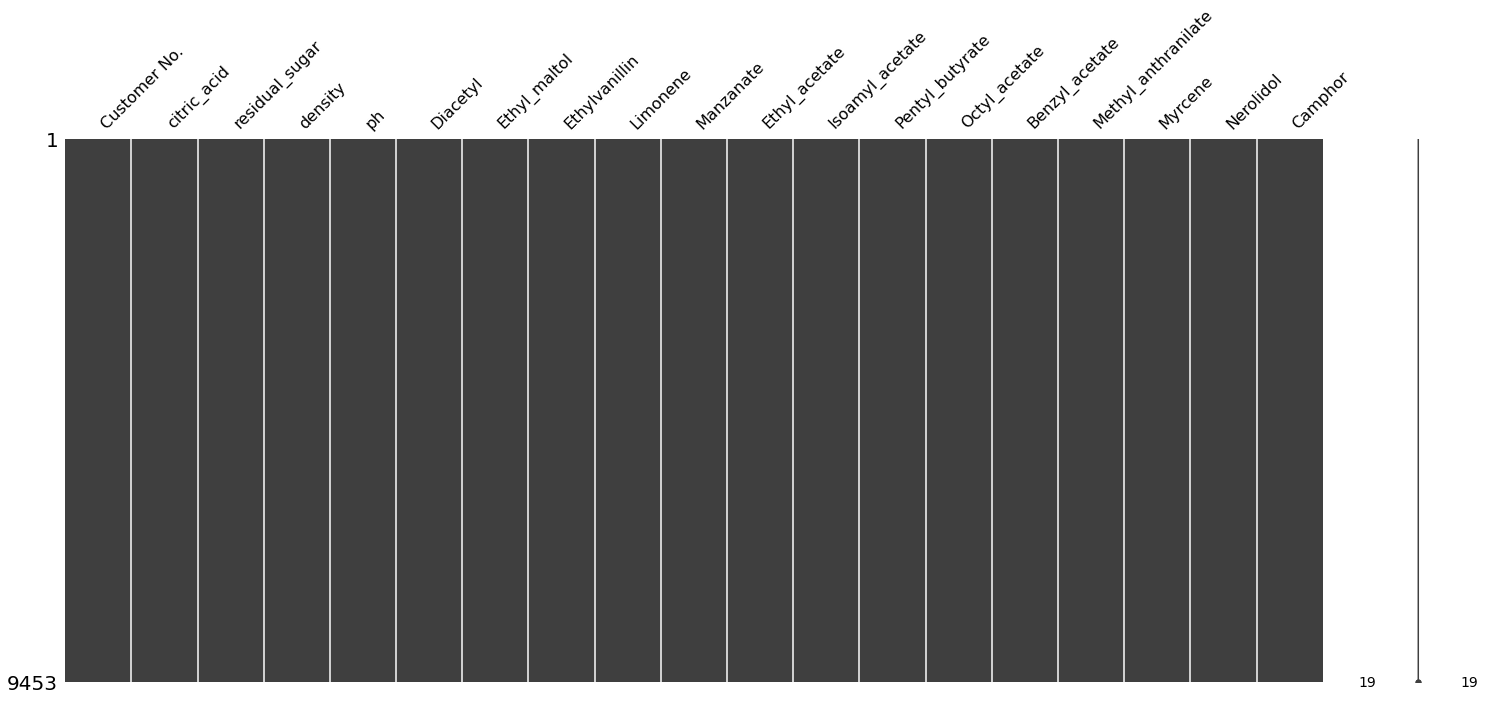

In [62]:
msno.matrix(Customer_Preference_dropped)

In [63]:
#Customer_Preference_dropped.shape
Customer_Preference_dropped.dtypes

Customer No.            object
citric_acid            float64
residual_sugar         float64
density                float64
ph                     float64
Diacetyl               float64
Ethyl_maltol           float64
Ethylvanillin           object
Limonene               float64
Manzanate              float64
Ethyl_acetate          float64
Isoamyl_acetate        float64
Pentyl_butyrate         object
Octyl_acetate          float64
Benzyl_acetate         float64
Methyl_anthranilate    float64
Myrcene                float64
Nerolidol              float64
Camphor                float64
dtype: object

In [64]:
Customer_Preference_dropped['Ethylvanillin']=Customer_Preference_dropped['Ethylvanillin'].astype(float)
Customer_Preference_dropped['Pentyl_butyrate']=Customer_Preference_dropped['Pentyl_butyrate'].astype(float)

<ipython-input-64-45194e354e27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_Preference_dropped['Ethylvanillin']=Customer_Preference_dropped['Ethylvanillin'].astype(float)
<ipython-input-64-45194e354e27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Customer_Preference_dropped['Pentyl_butyrate']=Customer_Preference_dropped['Pentyl_butyrate'].astype(float)


In [65]:
Customer_Preference_dropped.dtypes

Customer No.            object
citric_acid            float64
residual_sugar         float64
density                float64
ph                     float64
Diacetyl               float64
Ethyl_maltol           float64
Ethylvanillin          float64
Limonene               float64
Manzanate              float64
Ethyl_acetate          float64
Isoamyl_acetate        float64
Pentyl_butyrate        float64
Octyl_acetate          float64
Benzyl_acetate         float64
Methyl_anthranilate    float64
Myrcene                float64
Nerolidol              float64
Camphor                float64
dtype: object

# 1. Organising children into groups

First, while using K means method, i randomly set number of clusters into 3 and grouped children in to 3 groups. 
But as seen on the plotscatter, it is noticed that prominently discrete three groups are combined into 'blue' group. 
So, I noticed the necessity to check the appropriate numbers of clusters. 

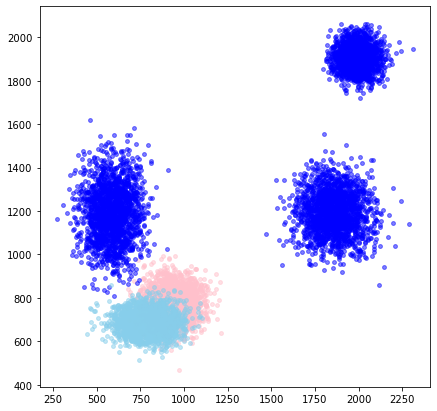

In [66]:
Customer_Preference = Customer_Preference_dropped.drop(['Customer No.'],axis=1)
standardized_Customer_Preference = preprocessing.scale(Customer_Preference )
standardized_Customer_Preference_df = pd.DataFrame(standardized_Customer_Preference, columns = Customer_Preference .columns)
kmeans = KMeans(n_clusters=3)
kmeans.fit(standardized_Customer_Preference_df)
y_km = kmeans.fit_predict(standardized_Customer_Preference_df)
plt.figure(figsize=(7,7))
plt.scatter(Customer_Preference[y_km ==0]['Diacetyl'],Customer_Preference[y_km ==0]['Limonene'], s= 15, c = 'pink',alpha=.5)
plt.scatter(Customer_Preference[y_km ==1]['Diacetyl'],Customer_Preference[y_km ==1]['Limonene'], s= 15, c = 'blue',alpha=.5)
plt.scatter(Customer_Preference[y_km ==2]['Diacetyl'],Customer_Preference[y_km ==2]['Limonene'], s= 15, c = 'skyblue',alpha=.5)


# 2. The number of clusters

I used <Elbow Method> to check the most appropriate number of clusters. Through visualizatino, we can notice that there is a huge fold when 5 clusters are made. 

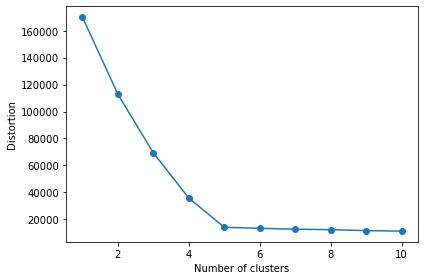

In [67]:
distortions = []
for i in range(1, 11):
    kmeans_plus = KMeans(n_clusters = i,init = 'k-means++',n_init = 10,max_iter = 300, random_state=0)
    kmeans_plus.fit(standardized_Customer_Preference_df)
    distortions.append(kmeans_plus.inertia_)
plt.plot(range(1,11),distortions, marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [68]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(standardized_Customer_Preference_df)
y_km = kmeans.fit_predict(standardized_Customer_Preference_df)

array([[<AxesSubplot:xlabel='citric_acid', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='residual_sugar', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='density', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='ph', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Diacetyl', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Ethyl_maltol', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Ethylvanillin', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Limonene', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Manzanate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Ethyl_acetate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Isoamyl_acetate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Pentyl_butyrate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Octyl_acetate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Benzyl_acetate', ylabel='citric_acid'>,
        <AxesSubplot:xlabel='Methyl_anthranilate', ylabel='citric_acid'>,
  

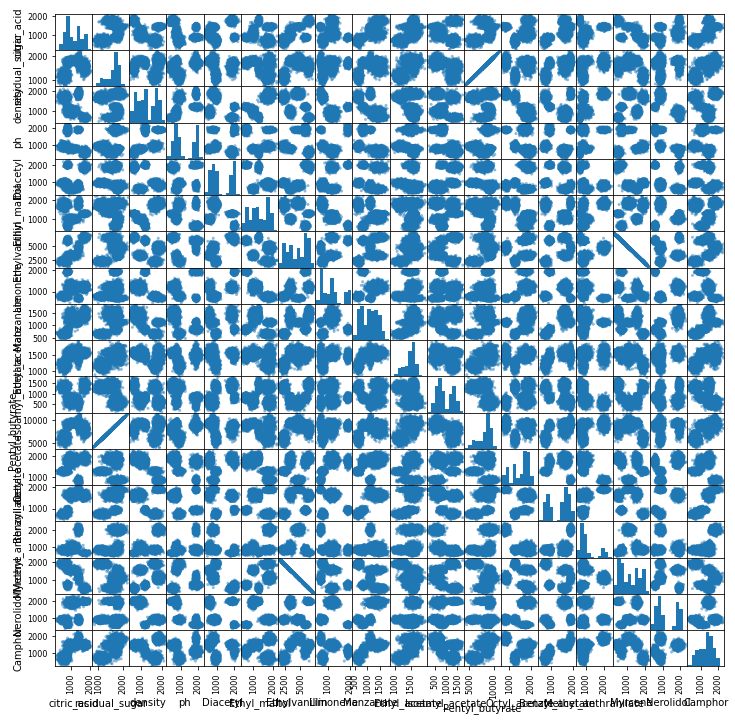

In [69]:
columns = Customer_Preference.iloc[:,0:18]
scatter_matrix(columns, figsize = (12, 12))

In [70]:
print(y_km[0:20])

[1 4 3 0 3 1 1 3 2 3 2 2 2 4 0 4 3 1 0 1]


AttributeError: module 'matplotlib.pyplot' has no attribute 'to_jpeg'

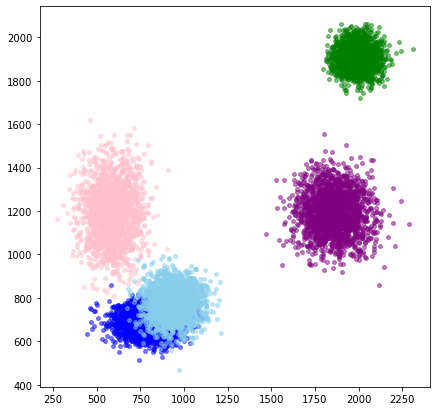

In [77]:
plt.figure(figsize=(7,7))
plt.scatter(Customer_Preference[y_km ==0]['Diacetyl'],Customer_Preference[y_km ==0]['Limonene'], s= 15, c = 'pink',alpha=.5)
plt.scatter(Customer_Preference[y_km ==1]['Diacetyl'],Customer_Preference[y_km ==1]['Limonene'], s= 15, c = 'blue',alpha=.5)
plt.scatter(Customer_Preference[y_km ==2]['Diacetyl'],Customer_Preference[y_km ==2]['Limonene'], s= 15, c = 'skyblue',alpha=.5)
plt.scatter(Customer_Preference[y_km ==3]['Diacetyl'],Customer_Preference[y_km ==3]['Limonene'], s= 15, c = 'purple',alpha=.5)
plt.scatter(Customer_Preference[y_km ==4]['Diacetyl'],Customer_Preference[y_km ==4]['Limonene'], s= 15, c = 'green',alpha=.5)


# 3. Chemical 

I made dataframes of every cluster's mean value. I found out that 2 chemicals,Ethylvanillin and Pentyl_butyrate both are favored by all 5 clusters. After cheking the common flavor chemicals, i chose 3 other flavor chemicals. Lists are given below. 

- Common : Ethylvanillin, Pentyl_butyrate
- First group : Diacetyl, Octyl_accetate, Nerolidol 
- Second group: residual sugar, Octyl_accetate,  Nerolidol 
- Third group: ph Diacetyl,Limonene 
- Fourth group: Ethylvanillin, Myrcene 
- Fivth group : density, Benzyl_acetate, Methyl_anthranilate 

In [72]:
#list of every cluster to dataframe
#this is to visualize the flavour chemicals needed for each group in one table. 

firstGroup_0 = Customer_Preference[y_km == 0].mean()
firstGroup = firstGroup_0.sort_values(ascending= False)
secondGroup_0 = Customer_Preference[y_km == 1].mean()
secondGroup = secondGroup_0.sort_values(ascending= False)
thirdGroup_0 = Customer_Preference[y_km == 2].mean()
thirdGroup = thirdGroup_0.sort_values(ascending= False)
fourthtGroup_0 = Customer_Preference[y_km == 3].mean()
fourthGroup = fourthtGroup_0.sort_values(ascending= False)
fivthGroup_0 = Customer_Preference[y_km == 4].mean()
fivthGroup = fivthGroup_0.sort_values(ascending= False)

print(firstGroup)
print(secondGroup)
print(thirdGroup)
print(fourthGroup)
print(fivthGroup)


# task 2-3 : I chose 2 common chemicals and 3 each differnt chemical for each group .

firstGroup = pd.DataFrame(firstGroup)
secondGroup = pd.DataFrame(secondGroup)
thirdGroup = pd.DataFrame(thirdGroup)
fourthGroup = pd.DataFrame(fourthGroup)
fivthGroup = pd.DataFrame(fivthGroup)

firstGroup = firstGroup.T
secondGroup = secondGroup.T
thirdGroup = thirdGroup.T
fourthGroup = fourthGroup.T
fivthGroup = fivthGroup.T

firstGroup = firstGroup[['citric_acid', 'residual_sugar', 'density', 'ph', 'Diacetyl','Ethyl_maltol', 'Ethylvanillin', 'Limonene', 'Manzanate','Ethyl_acetate', 'Isoamyl_acetate', 'Pentyl_butyrate', 'Octyl_acetate','Benzyl_acetate', 'Methyl_anthranilate', 'Myrcene', 'Nerolidol','Camphor']]
secondGroup = secondGroup[['citric_acid', 'residual_sugar', 'density', 'ph', 'Diacetyl',
       'Ethyl_maltol', 'Ethylvanillin', 'Limonene', 'Manzanate',
       'Ethyl_acetate', 'Isoamyl_acetate', 'Pentyl_butyrate', 'Octyl_acetate',
       'Benzyl_acetate', 'Methyl_anthranilate', 'Myrcene', 'Nerolidol',
       'Camphor']]
thirdGroup = thirdGroup[['citric_acid', 'residual_sugar', 'density', 'ph', 'Diacetyl',
       'Ethyl_maltol', 'Ethylvanillin', 'Limonene', 'Manzanate',
       'Ethyl_acetate', 'Isoamyl_acetate', 'Pentyl_butyrate', 'Octyl_acetate',
       'Benzyl_acetate', 'Methyl_anthranilate', 'Myrcene', 'Nerolidol',
       'Camphor']]
fourthGroup = fourthGroup[['citric_acid', 'residual_sugar', 'density', 'ph', 'Diacetyl',
       'Ethyl_maltol', 'Ethylvanillin', 'Limonene', 'Manzanate',
       'Ethyl_acetate', 'Isoamyl_acetate', 'Pentyl_butyrate', 'Octyl_acetate',
       'Benzyl_acetate', 'Methyl_anthranilate', 'Myrcene', 'Nerolidol',
       'Camphor']]
fivthGroup = fivthGroup[['citric_acid', 'residual_sugar', 'density', 'ph', 'Diacetyl',
       'Ethyl_maltol', 'Ethylvanillin', 'Limonene', 'Manzanate',
       'Ethyl_acetate', 'Isoamyl_acetate', 'Pentyl_butyrate', 'Octyl_acetate',
       'Benzyl_acetate', 'Methyl_anthranilate', 'Myrcene', 'Nerolidol',
       'Camphor']]




Pentyl_butyrate        9213.702688
Ethylvanillin          3323.793885
Nerolidol              1886.022667
Octyl_acetate          1811.219294
residual_sugar         1802.827095
Benzyl_acetate         1639.277280
Ethyl_acetate          1559.545598
Myrcene                1557.961518
Camphor                1471.988403
Manzanate              1332.172905
Limonene               1192.625198
citric_acid            1061.313126
Ethyl_maltol            990.780179
density                 975.746969
Methyl_anthranilate     963.867159
ph                      754.917238
Isoamyl_acetate         655.024776
Diacetyl                585.015814
dtype: float64
Pentyl_butyrate        9073.710709
Ethylvanillin          4647.710176
Methyl_anthranilate    1981.821524
Benzyl_acetate         1882.936601
ph                     1876.242941
density                1843.232818
Camphor                1837.381993
Ethyl_maltol           1823.341502
residual_sugar         1775.216303
Ethyl_acetate          1512.617475
citri

In [73]:
# to check the score- maybe it would help
X = Sweetie_Flavour_dropped.loc[:,'citric_acid':'Camphor']
Y = Sweetie_Flavour_dropped['Flavour_Score']

x_train, x_test, y_train, y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.4,
                                                   shuffle = True,
                                                   random_state=1004)
models = [
    LinearRegression(), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000,alpha=0.005, random_state=42),
    MLPRegressor(hidden_layer_sizes=[48, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[512, 4], max_iter=5000, alpha=0.005, random_state=42), 
    MLPRegressor(hidden_layer_sizes=[1024, 4], max_iter=5000, alpha=0.005, random_state=42)
    #MLPRegressor(hidden_layer_sizes=[1024, 512, 4], max_iter=5000, alpha=0.005, random_state=42)
]

for m in models:
    m.fit(x_train, y_train)
    print(m.__class__)
    print(r2_score(y_train, m.predict(x_train)))
    print(r2_score(y_test, m.predict(x_test)))
    

<class 'sklearn.linear_model._base.LinearRegression'>
0.9411242311868497
0.9369657837913401
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9901750083799952
0.9723046343245016
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9811376361406798
0.9731937046291181
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9901750083799952
0.9723046343245016
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9875104173415981
0.9757945525624758


In [79]:
predict1 = models[0].predict(firstGroup)
predict2 = models[0].predict(secondGroup)
predict3 = models[0].predict(thirdGroup)
predict4 = models[0].predict(fourthGroup)
predict5 = models[0].predict(fivthGroup)

predict = pd.DataFrame(predict1, columns = ['Flavour Score'])
predict.loc[1] = predict2
predict.loc[2] = predict3
predict.loc[3] = predict4
predict.loc[4] = predict5
predict = predict.reset_index(drop= True)


chemical_mean = pd.DataFrame(firstGroup)
chemical_mean = chemical_mean.append(secondGroup)
chemical_mean = chemical_mean.append(thirdGroup)
chemical_mean = chemical_mean.append(fourthGroup)
chemical_mean = chemical_mean.append(fivthGroup)
chemical_mean = chemical_mean.reset_index(drop= True)
chemical_recommendation = pd.concat([chemical_mean, predict],axis = 1).reset_index(drop=True)

chemical_recommendation = chemical_recommendation.round(decimals=2)
chemical_recommendation.to_csv("chemical_recommendation.csv")